In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

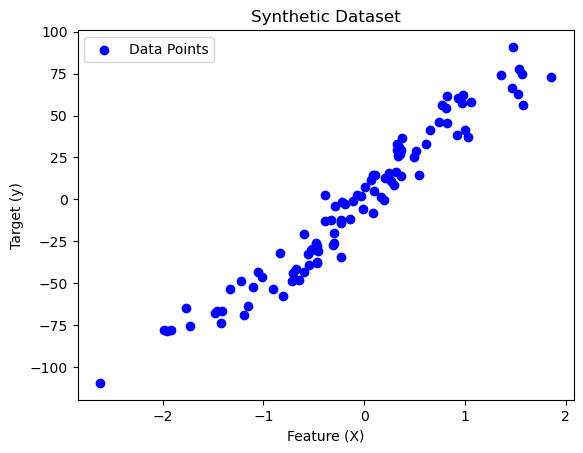

In [4]:
# Generate a synthetic dataset
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Add some non-linearity to the dataset
y = y + 10 * np.sin(X[:, 0] * 2)

# Plot the dataset
plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Synthetic Dataset")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

In [6]:
# Locally Weighted Regression function
def locally_weighted_regression(X, y, query_point, tau=0.1):
    # Compute weights using a Gaussian kernel
    weights = np.exp(-np.sum((X - query_point) ** 2, axis=1) / (2 * tau ** 2))
    
    # Add a bias term to X
    X_bias = np.c_[np.ones(X.shape[0]), X]
    
    # Compute the weighted least squares solution
    W = np.diag(weights)
    theta = np.linalg.inv(X_bias.T @ W @ X_bias) @ (X_bias.T @ W @ y)
    
    # Predict the target value for the query point
    query_point_bias = np.array([1, query_point[0]])
    y_pred = query_point_bias @ theta
    
    return y_pred


In [8]:
# Predict using Locally Weighted Regression
def predict_lwr(X_train, y_train, X_test, tau=0.1):
    y_pred = np.zeros(X_test.shape[0])
    for i, query_point in enumerate(X_test):
        y_pred[i] = locally_weighted_regression(X_train, y_train, query_point, tau)
    return y_pred

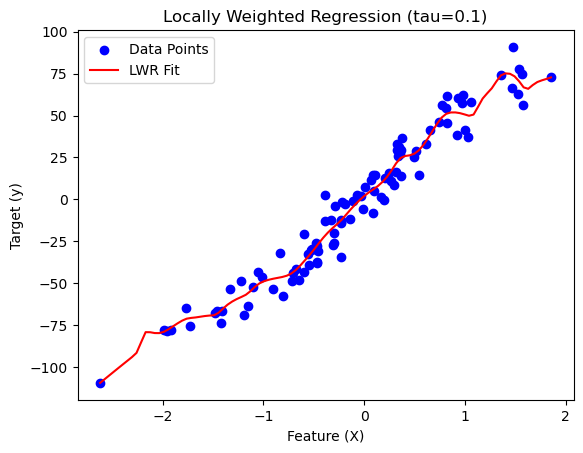

In [10]:
# Generate test points
X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Predict using LWR
tau = 0.1  # Bandwidth parameter
y_pred = predict_lwr(X, y, X_test, tau)

# Plot the results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_test, y_pred, color='red', label='LWR Fit')
plt.title(f"Locally Weighted Regression (tau={tau})")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

In [12]:
# Evaluate the model
mse = mean_squared_error(y, predict_lwr(X, y, X, tau))
print(f"Mean Squared Error (MSE) on Training Data: {mse:.4f}")

Mean Squared Error (MSE) on Training Data: 64.7316
